<a href="https://colab.research.google.com/github/vkdlxld7777/Project_Collection/blob/main/n223a_evaluation_metrics_for_classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 3*

# 📝 Assignment
---

In [1]:
# !pip install -U pandas-profiling
# !pip uninstall scikit-learn -y
# !pip install -U scikit-learn
# !pip install category_encoders
# !apt-get -qq install -y graphviz && pip install -q pydot
# !apt-get install graphviz libgraphviz-dev pkg-config
# !pip install pygraphviz

In [2]:
### 이곳에서 과제를 진행해 주세요 ###
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

# target = 'vacc_h1n1_f'
target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')


print(len(test))

train, val = train_test_split(train, test_size=len(test), 
                              stratify=train[target], random_state=2)

def engineer(df):
    # """특성을 엔지니어링 하는 함수입니다."""
        
    # # 새로운 특성을 생성합니다.
    # behaviorals = [col for col in df.columns if 'h1n1' in col]
    # print(behaviorals)
    # df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    
    # # 계절독감(seas)에 대한 모델을 학습할 것이기 때문에 h1n1에 대한 특성을 제거합니다.
    # dels = [col for col in df.columns if ('employment' in col or 'behavioral' in col)]
    # df.drop(columns=dels, inplace=True)

    # 새로운 특성을 생성합니다.
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    
    # 계절독감(seas)에 대한 모델을 학습할 것이기 때문에 h1n1에 대한 특성을 제거합니다.
    dels = [col for col in df.columns if ('employment' in col or 'h1n1' in col)]
    df.drop(columns=dels, inplace=True)

    return df


train = engineer(train)
val = engineer(val)
test = engineer(test)

features = train.drop(columns=[target]).columns
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
X_train.shape , y_train.shape , X_val.shape, y_val.shape

28104


((14050, 30), (14050,), (28104, 30), (28104,))

In [3]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 파이프라인을 만들어 봅시다.
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


검증 정확도:  0.7520281810418445


In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     15360
           1       0.74      0.69      0.72     12744

    accuracy                           0.75     28104
   macro avg       0.75      0.75      0.75     28104
weighted avg       0.75      0.75      0.75     28104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


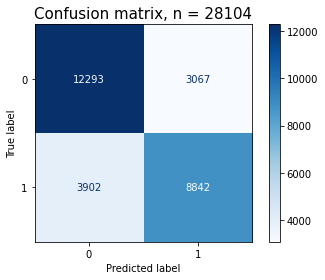

In [5]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

# Evaluation Metrics for Classification

### 1) Kaggle 챌린지를 이어서 진행합니다.
- **(Urclass Quiz) 다음 조건에서 F beta score를 구하고 제출하세요.**
    - TP = 4442, TN = 6165, FP = 1515, FN = 1930, 재현율에 정밀도의 2배 가중치를 부여합니다.

In [6]:
### 이곳에서 과제를 진행해 주세요 ### 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
pcm = confusion_matrix(y_val, y_pred)
print('TN : ',pcm[0][0])
print('FP : ',pcm[0][1])
print('FN : ',pcm[1][0])
print('TP : ',pcm[1][1])
f_beta = fbeta_score(y_val, y_pred, beta = 2)
f_beta

TN :  12293
FP :  3067
FN :  3902
TP :  8842


0.7030293392700961

### 2) 모델을 학습한 후 Confusion matrix를 그리고 해석하세요
- 임계값을 조정한 후 confusion matrix를 그려보세요
- **(Urclass Quiz) 임계값을 증가시킬때 positive 범주의 재현율 변화 중 올바른 설명을 고르세요.**
    1. 증가
    2. 감소
    3. 변화가 없다


In [7]:
### 이곳에서 과제를 진행해 주세요 ### 
import seaborn as sns
from ipywidgets import interact, fixed
y_pred_proba = pipe.predict_proba(X_val)[:, 1]



def explore_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba >= threshold
    vc = pd.Series(y_pred).value_counts()
    ax = sns.histplot(y_pred_proba, kde=True)
    ax.axvline(threshold, color='red')
    ax.set_title(f'# of target, 1={vc[1]}, 0={vc[0]}')
    plt.show()
    print(classification_report(y_true, y_pred))

    
interact(explore_threshold, 
    y_true=fixed(y_val), 
    y_pred_proba=fixed(y_pred_proba), 
    threshold=(0, 1, 0.01));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

### 3) 랜덤포레스트의 n_estimator를 1, 10, 100, 1000으로 바꾸어 가며 positive 범주의 predict_proba를 비교해 보세요
- 하이퍼파라미터는 다음과 같이 설정합니다.
    - n_jobs=-1, random_state=10, max_depth=None, oob_score=True
- **(Urclass Quiz) 확률값들의 분포의 변화를 아래 보기 중에서 고르세요**
    1. 다양해진다
    2. 변화가없다


In [8]:
### 이곳에서 과제를 진행해 주세요 ###
### 이곳에서 과제를 진행해 주세요 ### 
import seaborn as sns
from ipywidgets import interact, fixed
y_pred_proba = pipe.predict_proba(X_val)[:, 1]



def explore_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba >= threshold
    vc = pd.Series(y_pred).value_counts()
    ax = sns.histplot(y_pred_proba, kde=True)
    ax.axvline(threshold, color='red')
    ax.set_title(f'# of target, 1={vc[1]}, 0={vc[0]}')
    plt.show()
    print(classification_report(y_true, y_pred))

    
interact(explore_threshold, 
    y_true=fixed(y_val), 
    y_pred_proba=fixed(y_pred_proba), 
    threshold=(0, 1, 0.01));


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

### 4) 두개 이상의 다른 분류 모델을 학습시켜 ROC curve, AUC 점수를 비교하고 설명합니다.
- 더 좋은 결과가 나오는 모델을 사용해서 캐글에 제출하세요
- **(Urclass Quiz) 캐글 Leaderboard의 본인 Score를 제출하세요.**

In [9]:
### 이곳에서 과제를 진행해 주세요 ### 

## 🔥 도전과제(Github - Discussion)

### 5) confusion matrix, classification report 등을 그려 보시고, 각 평가지표들에 대해 최대한 분석하고 precision과 recall 중 어느 것을 높이는 방향으로 모델링 해야할지 논의해 보세요. 

In [10]:
### 이곳에서 과제를 진행해 주세요 ### 